<a href="https://colab.research.google.com/github/jechavarria12/World_GDP_Neural_netowrk/blob/main/Copia_de_world_bank_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌍 **Predicción de Categorías de PIB con Redes Neuronales**

## 🛠️ Tratamiento de Datos

In [ ]:
#Instalación de las librerías
!pip install -q pandas
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly
!pip install -q yellowbrick
!pip install -q scikit-learn
!pip install -q imbalanced-learn
!pip install -q tqdm
!pip install -q joblib
!pip install -q huggingface_hub
!pip install -q datasets
!pip install -q ydata_profiling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.1 MB/s eta 0:00:00


In [ ]:
# Importar el dataset desde Kaggle
!kaggle datasets download sazidthe1/world-gdp-data
DATASET_NAME = 'world-gdp-data'

%cd {ROOT_DIR}
!unzip -o {DATASET_NAME}.zip -d {DATASET_NAME}

Dataset URL: https://www.kaggle.com/datasets/sazidthe1/world-gdp-data
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/108k [00:00<?, ?B/s]
100% 108k/108k [00:00<00:00, 53.7MB/s]
[Errno 2] No such file or directory: '{ROOT_DIR}'
/content
Archive:  world-gdp-data.zip
  inflating: world-gdp-data/country_codes.csv  
  inflating: world-gdp-data/gdp_data.csv  


In [ ]:
#Usar pandas para tener los dos dataframes
import pandas as pd
pd.set_option('display.max_columns', None)

df_1=pd.read_csv("world-gdp-data//country_codes.csv")
df_2=pd.read_csv('world-gdp-data//gdp_data.csv')

In [ ]:
#Unir los Dataframes sobre la columna en común, country code
merged_df = pd.merge(df_1, df_2, on='country_code', how='inner')
print(merged_df.describe())
print(merged_df.isna().sum())
merged_df.dropna(inplace=True)

               year         value
count  10548.000000  1.054800e+04
mean    1994.977436  1.902435e+11
std       17.364673  1.031776e+12
min     1960.000000  8.824746e+06
25%     1981.000000  1.547855e+09
50%     1997.000000  8.140967e+09
75%     2010.000000  5.409850e+10
max     2022.000000  2.550000e+13
country_code    0
region          0
income_group    0
country_name    0
year            0
value           0
dtype: int64


In [ ]:
merged_df

,country_code,region,income_group,country_name,year,value
0,ABW,Latin America & Caribbean,High income,Aruba,1986,4.055866e+08
1,ABW,Latin America & Caribbean,High income,Aruba,1987,4.877095e+08
2,ABW,Latin America & Caribbean,High income,Aruba,1988,5.966480e+08
3,ABW,Latin America & Caribbean,High income,Aruba,1989,6.955307e+08
4,ABW,Latin America & Caribbean,High income,Aruba,1990,7.648045e+08
...,...,...,...,...,...,...
10543,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe,2018,3.415607e+10
10544,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe,2019,2.183223e+10
10545,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe,2020,2.150970e+10
10546,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe,2021,2.837124e+10


In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Calcular el valor promedio de 'value' para cada country_code
country_name_avg_value = merged_df.groupby('country_name')['value'].mean().sort_values()

# Crear un ranking basado en el valor promedio
country_name_ranking = {code: rank for rank, code in enumerate(country_name_avg_value.index)}

# Agregar el ranking al DataFrame(merged_df)
merged_df['country_name_rank'] = merged_df['country_name'].map(country_name_ranking)

LE = LabelEncoder()

# Ajustar y transformar la columna 'region' en el DataFrame completo
merged_df['region'] = LE.fit_transform(merged_df['region'])

# Mostrar el DataFrame después de la transformación
print("DataFrame después de transformar 'region y country_name':")
display(merged_df.head())

# Opcional: Ver el mapeo de regiones a valores numéricos
print("Mapeo de regiones a valores numéricos:")
for i, region in enumerate(LE.classes_):
    print(f"{region}: {i}")

pivoted_df = merged_df.pivot_table(index=['country_code', 'region', 'income_group', 'country_name', 'country_name_rank'],
                                   columns='year',
                                   values='value',
                                   aggfunc='first').reset_index()

# Display the pivoted dataframe
print("DataFrame pivoteado con el ranking de country_name:")
display(pivoted_df)

DataFrame después de transformar 'region y country_name':


,country_code,region,income_group,country_name,year,value,country_name_rank
0,ABW,2,High income,Aruba,1986,405586592.2,45
1,ABW,2,High income,Aruba,1987,487709497.2,45
2,ABW,2,High income,Aruba,1988,596648044.7,45
3,ABW,2,High income,Aruba,1989,695530726.3,45
4,ABW,2,High income,Aruba,1990,764804469.3,45


Mapeo de regiones a valores numéricos:
East Asia & Pacific: 0
Europe & Central Asia: 1
Latin America & Caribbean: 2
Middle East & North Africa: 3
North America: 4
South Asia: 5
Sub-Saharan Africa: 6
DataFrame pivoteado con el ranking de country_name:


year,country_code,region,income_group,country_name,country_name_rank,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,2,High income,Aruba,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN
1,AFG,5,Low income,Afghanistan,93,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.854235e+09,4.539497e+09,5.220825e+09,6.226199e+09,6.971383e+09,9.715765e+09,1.024977e+10,1.215484e+10,1.563384e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN
2,AGO,6,Lower middle income,Angola,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.554065e+09,7.072536e+09,8.084412e+09,8.769837e+09,1.020178e+10,1.122952e+10,1.270456e+10,1.511435e+10,1.105194e+10,3.390500e+09,5.561222e+09,7.526964e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936079e+09,1.528559e+10,1.781270e+10,2.355206e+10,3.697090e+10,5.238103e+10,6.526642e+10,8.853866e+10,7.030720e+10,8.169953e+10,1.090000e+11,1.250000e+11,1.330000e+11,1.370000e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.070000e+11
3,ALB,1,Upper middle income,Albania,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.857338e+09,1.897050e+09,2.097326e+09,2.080796e+09,2.051236e+09,2.253090e+09,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880951e+09,2.392765e+09,3.199641e+09,2.258514e+09,2.545965e+09,3.212122e+09,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052077e+09,8.896075e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192693e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301973e+10,1.515642e+10,1.540183e+10,1.516273e+10,1.793057e+10,1.888210e+10
4,AND,1,High income,Andorra,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861762e+07,8.940659e+07,1.134144e+08,1.508416e+08,1.865572e+08,2.201129e+08,2.272841e+08,2.539980e+08,3.080203e+08,4.115484e+08,4.463776e+08,3.889830e+08,3.759148e+08,3.278500e+08,3.300731e+08,3.467429e+08,4.819962e+08,6.113001e+08,7.214260e+08,7.954895e+08,1.028989e+09,1.106891e+09,1.209993e+09,1.007091e+09,1.017545e+09,1.178745e+09,1.224023e+09,1.180646e+09,1.211954e+09,1.239840e+09,1.429048e+09,1.546912e+09,1.755990e+09,2.361636e+09,2.895048e+09,3.159827e+09,3.456265e+09,3.952398e+09,4.085782e+09,3.674188e+09,3.449926e+09,3.629134e+09,3.188653e+09,3.193513e+09,3.271686e+09,2.789881e+09,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.325145e+09,3.352033e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
# Se rellena los valores no encontrados con -1
pivoted_df=pivoted_df.fillna(-1)
# Display the pivoted dataframe
display(pivoted_df)

year,country_code,region,income_group,country_name,country_name_rank,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,2,High income,Aruba,45,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,-1.000000e+00
1,AFG,5,Low income,Afghanistan,93,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,3.854235e+09,4.539497e+09,5.220825e+09,6.226199e+09,6.971383e+09,9.715765e+09,1.024977e+10,1.215484e+10,1.563384e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,-1.000000e+00
2,AGO,6,Lower middle income,Angola,147,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.554065e+09,7.072536e+09,8.084412e+09,8.769837e+09,1.020178e+10,1.122952e+10,1.270456e+10,1.511435e+10,1.105194e+10,3.390500e+09,5.561222e+09,7.526964e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936079e+09,1.528559e+10,1.781270e+10,2.355206e+10,3.697090e+10,5.238103e+10,6.526642e+10,8.853866e+10,7.030720e+10,8.169953e+10,1.090000e+11,1.250000e+11,1.330000e+11,1.370000e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.070000e+11
3,ALB,1,Upper middle income,Albania,91,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.857338e+09,1.897050e+09,2.097326e+09,2.080796e+09,2.051236e+09,2.253090e+09,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880951e+09,2.392765e+09,3.199641e+09,2.258514e+09,2.545965e+09,3.212122e+09,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052077e+09,8.896075e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192693e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301973e+10,1.515642e+10,1.540183e+10,1.516273e+10,1.793057e+10,1.888210e+10
4,AND,1,High income,Andorra,40,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000

In [ ]:
# Descargar la base de datos de la población mundial por países en el 2022 para calcular el GDP per cápita de cada país
!kaggle datasets download iamsouravbanerjee/world-population-dataset
DATASET_NAME = 'world-population-dataset'

%cd {ROOT_DIR}
!unzip -o {DATASET_NAME}.zip -d {DATASET_NAME}


Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset
License(s): other
  0% 0.00/15.7k [00:00<?, ?B/s]
100% 15.7k/15.7k [00:00<00:00, 24.9MB/s]
[Errno 2] No such file or directory: '{ROOT_DIR}'
/content
Archive:  world-population-dataset.zip
  inflating: world-population-dataset/world_population.csv  


In [ ]:
# Eliminar las variables del data set que no interesan al modelo
df_3=pd.read_csv('world-population-dataset//world_population.csv')
df_3=df_3.drop(columns=["Rank","Country/Territory","Capital","Continent",
                        "2020 Population","2015 Population",'Area (km²)',
                        'Density (per km²)',"2010 Population","2000 Population",
                        "1990 Population","1980 Population","1970 Population",
                        "Growth Rate","World Population Percentage"])
display(df_3.head())
# Cambiar el nombre de la columna de los códigos de los países para que sea igual a mi dataset anterior
df_3.rename(columns={'CCA3': 'country_code'}, inplace=True)
# Juntar los dos datasets
df_final = pd.merge(pivoted_df, df_3, on='country_code', how='inner')
display(df_final.head())

,CCA3,2022 Population
0,AFG,41128771
1,ALB,2842321
2,DZA,44903225
3,ASM,44273
4,AND,79824


,country_code,region,income_group,country_name,country_name_rank,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2022 Population
0,ABW,2,High income,Aruba,45,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,-1.000000e+00,106445
1,AFG,5,Low income,Afghanistan,93,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,3.854235e+09,4.539497e+09,5.220825e+09,6.226199e+09,6.971383e+09,9.715765e+09,1.024977e+10,1.215484e+10,1.563384e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,-1.000000e+00,41128771
2,AGO,6,Lower middle income,Angola,147,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.554065e+09,7.072536e+09,8.084412e+09,8.769837e+09,1.020178e+10,1.122952e+10,1.270456e+10,1.511435e+10,1.105194e+10,3.390500e+09,5.561222e+09,7.526964e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936079e+09,1.528559e+10,1.781270e+10,2.355206e+10,3.697090e+10,5.238103e+10,6.526642e+10,8.853866e+10,7.030720e+10,8.169953e+10,1.090000e+11,1.250000e+11,1.330000e+11,1.370000e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.070000e+11,35588987
3,ALB,1,Upper middle income,Albania,91,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.857338e+09,1.897050e+09,2.097326e+09,2.080796e+09,2.051236e+09,2.253090e+09,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880951e+09,2.392765e+09,3.199641e+09,2.258514e+09,2.545965e+09,3.212122e+09,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052077e+09,8.896075e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192693e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301973e+10,1.515642e+10,1.540183e+10,1.516273e+10,1.793057e+10,1.888210e+10,2842321
4,AND,1,High income,Andorra,40,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,7.861762e+07,8.940659e+07,1.134144e+08,1.508416e+08,1.865572e+08,2.201129e+0

### Regla para dividir el GDP en Low, Medium y High

Decidimos hacer la división de las tres categorías del PIB a partir de percentiles, debido a que no encontramos alguna literatura que tuviese en cuenta dicha división, solo en cuanto a ingreso de los países.

In [ ]:
# Crear la columna de GDP per cápita para el 2022 para cada país
df_final["GDP_per_capita_2022"]=df_final[2022]/df_final["2022 Population"]

# Clasificar como GDP bajo hasta al percentil 33, medio hasta el percentil 66 y alto percentil 100
df_final['Clasificacion'] = pd.qcut(
    df_final['GDP_per_capita_2022'],
    q=[0, 0.33, 0.66, 1],  # Define los percentiles 33 y 66
    labels=['GDP bajo', 'GDP medio', 'GDP alto'])
display(df_final.head())

,country_code,region,income_group,country_name,country_name_rank,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2022 Population,GDP_per_capita_2022,Clasificacion
0,ABW,2,High income,Aruba,45,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,-1.000000e+00,106445,-9.394523e-06,GDP bajo
1,AFG,5,Low income,Afghanistan,93,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,3.854235e+09,4.539497e+09,5.220825e+09,6.226199e+09,6.971383e+09,9.715765e+09,1.024977e+10,1.215484e+10,1.563384e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,-1.000000e+00,41128771,-2.431388e-08,GDP bajo
2,AGO,6,Lower middle income,Angola,147,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.554065e+09,7.072536e+09,8.084412e+09,8.769837e+09,1.020178e+10,1.122952e+10,1.270456e+10,1.511435e+10,1.105194e+10,3.390500e+09,5.561222e+09,7.526964e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936079e+09,1.528559e+10,1.781270e+10,2.355206e+10,3.697090e+10,5.238103e+10,6.526642e+10,8.853866e+10,7.030720e+10,8.169953e+10,1.090000e+11,1.250000e+11,1.330000e+11,1.370000e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.070000e+11,35588987,3.006548e+03,GDP medio
3,ALB,1,Upper middle income,Albania,91,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.857338e+09,1.897050e+09,2.097326e+09,2.080796e+09,2.051236e+09,2.253090e+09,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880951e+09,2.392765e+09,3.199641e+09,2.258514e+09,2.545965e+09,3.212122e+09,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052077e+09,8.896075e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192693e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301973e+10,1.515642e+10,1.540183e+10,1.516273e+10,1.793057e+10,1.888210e+10,2842321,6.643196e+03,GDP medio
4,AND,1,High income,Andorra,40,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,-1.000

In [ ]:
from sklearn.model_selection import train_test_split
# 1. Definir X e y
X = df_final[[1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,
              1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,
                    1986,              1987,              1988,
                    1989,              1990,              1991,
                    1992,              1993,              1994,
                    1995,              1996,              1997,
                    1998,              1999,              2000,
                    2001,              2002,              2003,
                    2004,              2005,              2006,
                    2007,              2008,              2009,
                    2010,              2011,              2012,
                    2013,              2014,              2015,
                    2016,              2017,              2018,
                    2019,              2020,              2021,
                    2022,"income_group","country_name_rank","region"]]
y = df_final['Clasificacion']

# 2. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # Tamaño del conjunto de prueba (20% en este caso)
    random_state=42,  # Semilla para reproducibilidad
    stratify=y       # Mantener la proporción de clases en y
)

# Mostrar las primeras filas de X_train y X_test
print("Primeras filas de X_train:")
display(X_train.head())

print("\nPrimeras filas de X_test:")
display(X_test.head())

# Mostrar las primeras filas de y_train y y_test
print("\nPrimeras filas de y_train:")
display(y_train.head())

print("\nPrimeras filas de y_test:")
display(y_test.head())


Primeras filas de X_train:


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,income_group,country_name_rank,region
81,3.356500e+08,3.562000e+08,3.877500e+08,4.102000e+08,4.570000e+08,5.086500e+08,5.499500e+08,5.981000e+08,6.468000e+08,6.680000e+08,7.230000e+08,7.310000e+08,8.029963e+08,9.124996e+08,1.034500e+09,1.124000e+09,1.348000e+09,1.669500e+09,3.097242e+09,3.544282e+09,3.968160e+09,4.043895e+09,4.266504e+09,4.476697e+09,4.915312e+09,5.278121e+09,5.677829e+09,6.190521e+09,5.902717e+09,5.432345e+09,4.923010e+09,4.648668e+09,4.943700e+09,4.926729e+09,4.642281e+09,5.347445e+09,5.215029e+09,5.737100e+09,6.366340e+09,6.414521e+09,7.186638e+09,7.651162e+09,7.858255e+09,8.230392e+09,8.869299e+09,9.757013e+09,1.091748e+10,1.236126e+10,1.388173e+10,1.458750e+10,1.583934e+10,1.771028e+10,1.852855e+10,1.849973e+10,1.975653e+10,2.097979e+10,2.171760e+10,2.313625e+10,2.406775e+10,2.508994e+10,2.382786e+10,2.848872e+10,3.171770e+10,Lower middle income,96,2
11,6.592694e+09,7.311750e+09,7.756110e+09,8.374175e+09,9.169984e+09,9.994071e+09,1.088768e+10,1.157943e+10,1.244063e+10,1.358280e+10,1.537301e+10,1.785849e+10,2.205961e+10,2.951547e+10,3.518930e+10,4.005921e+10,4.295998e+10,5.154576e+10,6.205226e+10,7.393730e+10,8.205891e+10,7.103423e+10,7.127529e+10,7.212102e+10,6.798534e+10,6.938677e+10,9.903616e+10,1.240000e+11,1.330000e+11,1.330000e+11,1.660000e+11,1.740000e+11,1.950000e+11,1.900000e+11,2.040000e+11,2.410000e+11,2.370000e+11,2.130000e+11,2.180000e+11,2.170000e+11,1.970000e+11,1.980000e+11,2.140000e+11,2.620000e+11,3.010000e+11,3.160000e+11,3.360000e+11,3.890000e+11,4.320000e+11,4.020000e+11,3.920000e+11,4.320000e+11,4.090000e+11,4.300000e+11,4.430000e+11,3.820000e+11,3.960000e+11,4.170000e+11,4.550000e+11,4.450000e+11,4.350000e+11,4.800000e+11,4.710000e+11,High income,189,1
79,1.702162e+08,1.858495e+08,1.949495e+08,1.757579e+08,1.947745e+08,2.132353e+08,2.287059e+08,2.501765e+08,2.297500e+08,2.493000e+08,2.678000e+08,2.820500e+08,2.853810e+08,3.070476e+08,4.339545e+08,4.947917e+08,4.544400e+08,4.498800e+08,5.070800e+08,5.304400e+08,6.032000e+08,5.703571e+08,4.820000e+08,4.893333e+08,4.376316e+08,4.534884e+08,5.046511e+08,3.545918e+08,4.138000e+08,3.797794e+08,3.965823e+08,3.485331e+08,3.735731e+08,4.541014e+08,5.408749e+08,6.216268e+08,7.054060e+08,7.491380e+08,7.175307e+08,6.947550e+08,7.126679e+08,7.121674e+08,7.261314e+08,7.430639e+08,7.878144e+08,8.248806e+08,2.379818e+09,2.730972e+09,3.025187e+09,3.165663e+09,3.432913e+09,3.691384e+09,4.063089e+09,4.167801e+09,4.127660e+09,4.279840e+09,4.482697e+09,4.748174e+09,4.787637e+09,5.173760e+09,5.471257e+09,8.044499e+09,1.535754e+10,High income,39,2
208,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,1.712479e+10,1.925699e+10,2.121839e+10,2.341108e+10,2.451591e+10,3.326277e+10,4.138919e+10,4.290692e+10,4.115045e+10,4.532840e+10,5.160740e+10,6.303869e+10,8.941189e+10,9.314148e+10,8.590407e+10,9.620411e+10,8.487013e+10,6.445938e+10,7.335478e+10,9.653575e+10,1.040000e+11,1.080000e+11,1.260000e+11,1.350000e+11,1.470000e+11,1.470000e+11,1.540000e+11,1.720000e+11,1.630000e+11,1.690000e+11,1.530000e+11,1.520000e+11,1.520000e+11,1.350000e+11,1.290000e+11,1.970000e+11,2.560000e+11,2.890000e+11,3.040000e+11,3.330000e+11,3.160000e+11,3.300000e+11,4.170000e+11,4.580000e+11,4.340000e+11,4.010000e+11,3.810000e+11,3.470000e+11,3.240000e+11,3.810000e+11,4.040000e+11,3.890000e+11,3.380000e+11,4.190000e+11,4.060000e+11,Upper middle income,183,6
27,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,3.118046e+08,4.021786e+08,4.359113e+08,4.950977e+08,5.528837e+08,6.70362


Primeras filas de X_test:


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,income_group,country_name_rank,region
52,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.193174e+10,1.305907e+10,1.350557e+10,1.541490e+10,1.707546e+10,1.908563e+10,2.323241e+10,3.073063e+10,3.416044e+10,4.047441e+10,4.457571e+10,4.978441e+10,6.036266e+10,7.036680e+10,7.112700e+10,6.187810e+10,6.041254e+10,6.064484e+10,5.910528e+10,6.265862e+10,8.807885e+10,1.090000e+11,1.160000e+11,1.120000e+11,1.380000e+11,1.390000e+11,1.530000e+11,1.430000e+11,1.560000e+11,1.850000e+11,1.880000e+11,1.740000e+11,1.770000e+11,1.780000e+11,1.640000e+11,1.650000e+11,1.790000e+11,2.180000e+11,2.510000e+11,2.640000e+11,2.830000e+11,3.190000e+11,3.530000e+11,3.210000e+11,3.220000e+11,3.440000e+11,3.270000e+11,3.440000e+11,3.530000e+11,3.030000e+11,3.130000e+11,3.320000e+11,3.570000e+11,3.460000e+11,3.550000e+11,3.980000e+11,3.950000e+11,High income,185,1
133,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,7.040309e+08,8.236334e+08,1.015369e+09,1.211140e+09,1.131789e+09,1.142388e+09,1.078404e+09,1.090277e+09,1.040555e+09,1.076122e+09,1.462905e+09,1.880850e+09,2.134513e+09,2.181935e+09,2.653486e+09,2.856889e+09,3.224266e+09,3.263364e+09,3.558144e+09,4.040342e+09,4.421952e+09,4.187376e+09,4.169673e+09,4.343709e+09,4.663321e+09,4.613637e+09,4.841310e+09,5.816559e+09,6.578840e+09,6.488743e+09,7.028811e+09,8.150150e+09,9.990357e+09,9.128843e+09,1.000367e+10,1.151841e+10,1.166870e+10,1.229297e+10,1.307413e+10,1.200729e+10,1.259416e+10,1.371351e+10,1.473570e+10,1.443635e+10,1.140104e+10,1.147643e+10,1.289831e+10,Upper middle income,80,6
86,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,9.147629e+08,1.023006e+09,1.180968e+09,1.382605e+09,1.567403e+09,1.563668e+09,1.659131e+09,1.947333e+09,2.328658e+09,2.822358e+09,3.032409e+09,3.422735e+09,4.466354e+09,5.928789e+09,5.486919e+09,5.920367e+09,6.565669e+09,6.690228e+09,7.001180e+09,7.708459e+09,7.084796e+09,6.846373e+09,6.979791e+09,7.491654e+09,7.314967e+09,6.684229e+09,-1.000000e+00,-1.000000e+00,High income,64,1
101,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.429528e+07,1.527863e+07,1.893653e+07,3.171066e+07,8.563717e+07,5.508389e+07,4.111042e+07,3.874699e+07,4.521214e+07,4.261822e+07,4.212951e+07,4.366739e+07,4.057360e+07,3.783733e+07,4.212303e+07,3.212526e+07,3.141765e+07,3.570978e+07,4.453444e+07,4.428289e+07,4.293331e+07,4.751682e+07,4.773626e+07,4.692090e+07,5.483455e+07,5.633667e+07,6.651729e+07,6.753848e+07,6.533368e+07,6.903448e+07,6.725313e+07,6.309989e+07,7.219793e+07,9.023103e+07,1.023706e+08,1.121362e+08,1.102371e+08,1.326748e+08,1.410452e+08,1.324211e+08,1.553055e+08,1.806727e+08,1.896299e+08,1.845431e+08,1.778682e+08,1.702923e+08,1.785080e+08,1.885407e+08,1.965015e+08,1.751817e+08,1.775533e+08,2.276100e+08,2.233529e+08,Lower middle income,1,0
33,9.522747e+09,1.071271e+10,1.187998e+10,1.306364e+10,1.448056e+10,1.534674e+10,1.648006e+10,1.774001e+10,1.894273e+10,2.052489e+10,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,


Primeras filas de y_train:


,Clasificacion
81,GDP medio
11,GDP alto
79,GDP alto
208,GDP medio
27,GDP alto



Primeras filas de y_test:


,Clasificacion
52,GDP alto
133,GDP medio
86,GDP bajo
101,GDP bajo
33,GDP alto


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

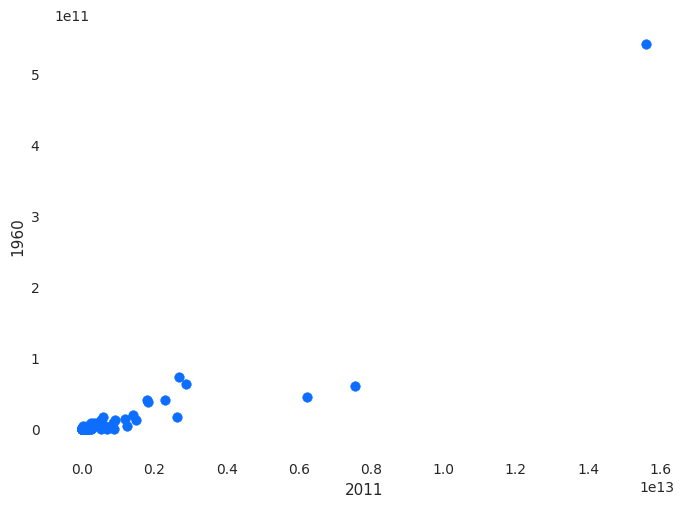

In [ ]:
from ydata_profiling import ProfileReport
reporte_train = ProfileReport(X_train, title="Profiling Report Train dataset")
reporte_train.to_file("reporte_train.html")
reporte_train


In [ ]:
##Escalar los datos
# Verificar las columnas antes de la conversión
print("Columnas en X_train:", X_train.columns.tolist())
print("Columnas en X_test:", X_test.columns.tolist())

# Convertir las columnas de años en X_train a strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Verificar después de la conversión
print("Columnas en X_train después de la conversión:", X_train.columns.tolist())
print("Columnas en X_test después de la conversión:", X_test.columns.tolist())


##Separar las columnas de años y no numéricas
#Columnas de años
year_columns = [str(year) for year in range(1960, 2023)]

# Columnas no numéricas (no se escalan)
non_numeric_columns = ['income_group']

# Separar las columnas de años y las no numéricas
X_train_years = X_train[year_columns]
X_train_non_numeric = X_train[non_numeric_columns]

X_test_years = X_test[year_columns]
X_test_non_numeric = X_test[non_numeric_columns]

# Escalar las columnas de años
scaler = StandardScaler()
X_train_years_scaled = scaler.fit_transform(X_train_years)
X_test_years_scaled = scaler.transform(X_test_years)

# Convertir a DataFrames
X_train_years_scaled = pd.DataFrame(X_train_years_scaled, columns=year_columns, index=X_train.index)
X_test_years_scaled = pd.DataFrame(X_test_years_scaled, columns=year_columns, index=X_test.index)

# Unir las columnas escaladas con las no numéricas
X_train_scaled = pd.concat([X_train_non_numeric, X_train_years_scaled], axis=1)
X_test_scaled = pd.concat([X_test_non_numeric, X_test_years_scaled], axis=1)

# Verificar
print("X_train escalado:")
display(X_train_scaled.head())

print("X_test escalado:")
display(X_test_scaled.head())

Columnas en X_train: [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 'income_group', 'country_name_rank', 'region']
Columnas en X_test: [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 'income_group', 'country_name_rank', 'region']
Columnas en X_train después de la conversión: ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '196

,income_group,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
81,Lower middle income,-0.147890,-0.149098,-0.148334,-0.152023,-0.153780,-0.155097,-0.154026,-0.155635,-0.154456,-0.157246,-0.162562,-0.165486,-0.170894,-0.181457,-0.191732,-0.196696,-0.192668,-0.192933,-0.189323,-0.196214,-0.203947,-0.194199,-0.187433,-0.177875,-0.169476,-0.166446,-0.176048,-0.183172,-0.187281,-0.189348,-0.202857,-0.199805,-0.199505,-0.192925,-0.194013,-0.201627,-0.206120,-0.202308,-0.196774,-0.193085,-0.189184,-0.186183,-0.189181,-0.198363,-0.207621,-0.212226,-0.216943,-0.228687,-0.238972,-0.231188,-0.239192,-0.245052,-0.239519,-0.237957,-0.233481,-0.215447,-0.214144,-0.215498,-0.214156,-0.209919,-0.205208,-0.204565,-0.199683
11,High income,-0.001945,0.007300,0.005861,0.005319,0.006096,0.005278,0.005684,0.004525,0.002946,0.001714,0.008037,0.017944,0.032998,0.059507,0.072532,0.079079,0.073664,0.091615,0.099777,0.112309,0.109372,0.050058,0.051689,0.045716,0.019889,0.013096,0.059480,0.088048,0.076270,0.061312,0.095122,0.096961,0.112736,0.093631,0.091773,0.113167,0.101695,0.066850,0.070672,0.055865,0.021571,0.024382,0.033833,0.058963,0.068572,0.061393,0.058300,0.071292,0.079948,0.068449,0.035847,0.037027,0.014261,0.021620,0.020582,-0.003781,-0.000026,-0.001946,0.004094,-0.004682,-0.003410,-0.009459,-0.020232
79,High income,-0.151749,-0.152928,-0.152369,-0.156655,-0.158592,-0.160092,-0.158989,-0.160709,-0.160022,-0.162399,-0.167862,-0.170294,-0.175859,-0.186558,-0.196379,-0.201153,-0.198387,-0.199891,-0.202024,-0.209423,-0.217448,-0.206864,-0.200938,-0.191055,-0.182920,-0.179958,-0.189099,-0.196607,-0.198663,-0.199276,-0.211231,-0.207340,-0.207013,-0.199850,-0.199893,-0.207940,-0.212109,-0.208786,-0.203912,-0.199847,-0.196372,-0.193859,-0.196897,-0.205956,-0.215261,-0.220206,-0.224172,-0.236357,-0.247253,-0.240022,-0.248264,-0.254597,-0.248920,-0.246997,-0.242863,-0.225239,-0.224003,-0.225467,-0.223920,-0.219653,-0.214217,-0.213399,-0.206366
208,Upper middle income,0.048342,0.050343,0.048925,0.054316,0.057217,0.057267,0.057033,0.066393,0.065462,0.071553,0.076107,0.077410,0.056559,0.091075,0.120503,0.099249,0.062082,0.056144,0.048558,0.064542,0.138874,0.130664,0.103891,0.125319,0.070585,-0.000704,-0.005310,0.024820,0.016135,0.012189,0.021126,0.028618,0.033878,0.027053,0.020096,0.020994,0.003421,0.009710,-0.011470,-0.020977,-0.028394,-0.045309,-0.058124,-0.006948,0.026027,0.037269,0.031206,0.026690,-0.008531,0.012762,0.054126,0.054730,0.030510,0.003326,-0.016635,-0.024301,-0.041215,-0.021465,-0.021735,-0.032053,-0.051017,-0.035819,-0.046785
27,High income,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170981,-0.173315,-0.178596,-0.189144,-0.197324,-0.201809,-0.198506,-0.199633,-0.201799,-0.208810,-0.215806,-0.204881,-0.198505,-0.188587,-0.180190,-0.177281,-0.186467,-0.193500,-0.195762,-0.196081,-0.208242,-0.204410,-0.204411,-0.197359,-0.197584,-0.205809,-0.209907,-0.206514,-0.201259,-0.197179,-0.193766,-0.191268,-0.194322,-0.203455,-0.212750,-0.217531,-0.222616,-0.234810,-0.245911,-0.239016,-0.247462,-0.253939,-0.248565,-0.246676,-0.242521,-0.224978,-0.223803,-0.225341,-0.223763,-0.219580,-0.214609,-0.214782,-0.210337


X_test escalado:


,income_group,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
52,High income,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,0.021814,0.026105,0.017159,0.024264,0.027862,0.031086,0.044248,0.069744,0.064572,0.082019,0.084005,0.081566,0.091491,0.096660,0.065510,0.016673,0.012925,0.007782,-0.006773,-0.005747,0.031836,0.053515,0.041019,0.020049,0.043325,0.035628,0.043735,0.020859,0.022963,0.038360,0.036622,0.016204,0.018860,0.009760,-0.015070,-0.012123,-0.004031,0.014346,0.021300,0.014933,0.013426,0.015540,0.019691,0.005801,-0.015335,-0.022889,-0.039033,-0.032629,-0.033443,-0.050099,-0.047508,-0.048033,-0.045539,-0.053070,-0.042673,-0.044893,-0.051279
133,Upper middle income,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170981,-0.173315,-0.178596,-0.189144,-0.199736,-0.204657,-0.196790,-0.197758,-0.199531,-0.206440,-0.215327,-0.204778,-0.198810,-0.189068,-0.181110,-0.178214,-0.186681,-0.193094,-0.195094,-0.195735,-0.207056,-0.202945,-0.202329,-0.195501,-0.195567,-0.203373,-0.207173,-0.204321,-0.199550,-0.195533,-0.191985,-0.189543,-0.192445,-0.200811,-0.209786,-0.215146,-0.220235,-0.232041,-0.241941,-0.235409,-0.243459,-0.249268,-0.243977,-0.241872,-0.237492,-0.220708,-0.219363,-0.220607,-0.218882,-0.215126,-0.211307,-0.211916,-0.207371
86,High income,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170981,-0.173315,-0.178596,-0.189144,-0.199736,-0.204657,-0.201296,-0.202457,-0.204511,-0.211748,-0.219868,-0.208943,-0.202658,-0.192672,-0.184234,-0.181228,-0.190372,-0.197424,-0.199521,-0.200022,-0.211964,-0.207951,-0.207627,-0.200553,-0.200668,-0.207549,-0.211687,-0.208225,-0.203072,-0.198815,-0.195427,-0.192812,-0.195576,-0.204348,-0.213338,-0.218234,-0.223289,-0.234975,-0.245039,-0.238226,-0.246445,-0.252640,-0.247213,-0.245210,-0.240713,-0.223594,-0.222651,-0.224258,-0.222551,-0.218607,-0.213621,-0.216875,-0.212640
101,Lower middle income,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170814,-0.173151,-0.178415,-0.188877,-0.199074,-0.204267,-0.201033,-0.202236,-0.204289,-0.211561,-0.219699,-0.208784,-0.202513,-0.192547,-0.184108,-0.181138,-0.190293,-0.197341,-0.199428,-0.199935,-0.211885,-0.207868,-0.207548,-0.200481,-0.200590,-0.208695,-0.212957,-0.209671,-0.204736,-0.200587,-0.197088,-0.194577,-0.197605,-0.206618,-0.215909,-0.220843,-0.226093,-0.238427,-0.249453,-0.242368,-0.250660,-0.256987,-0.251438,-0.249510,-0.245234,-0.227648,-0.226465,-0.227940,-0.226246,-0.222096,-0.216815,-0.216777,-0.212549
33,High income,0.066399,0.083772,0.092159,0.097967,0.103541,0.095779,0.092082,0.094376,0.089724,0.087159,-0.170981,-0.173315,-0.178596,-0.189144,-0.199736,-0.204657,-0.201296,-0.202457,-0.204511,-0.211748,0.273637,0.199425,0.207721,0.187447,0.143034,0.129637,0.210759,0.260712,0.248380,0.208682,0.280114,0.263435,0.252381,0.220595,0.230826,0.262781,0.238481,0.173338,0.178089,0.151621,0.112618,0.122835,0.136609,0.160364,0.165952,0.152527,0.148049,0.152531,0.182920,0.186011,0.187200,0.230396,0.194293,0.195722,0.191061,0.179145,0.167020,0.148785,0.141345,0.130217,0.146279,0.129250,0.117436


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identificar las columnas categóricas
categorical_columns = ['income_group']

# Crear el codificador
encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar las columnas categóricas
X_train_categorical_encoded = encoder.fit_transform(X_train_scaled[categorical_columns])
X_test_categorical_encoded = encoder.transform(X_test_scaled[categorical_columns])

# Convertir a DataFrame
X_train_categorical_encoded = pd.DataFrame(
    X_train_categorical_encoded,
    columns=encoder.get_feature_names_out(categorical_columns),
    index=X_train_scaled.index
)
X_test_categorical_encoded = pd.DataFrame(
    X_test_categorical_encoded,
    columns=encoder.get_feature_names_out(categorical_columns),
    index=X_test_scaled.index
)

# Unir con las columnas escaladas y no numéricas
X_train_final = pd.concat([X_train_scaled.drop(columns=categorical_columns), X_train_categorical_encoded], axis=1)
X_test_final = pd.concat([X_test_scaled.drop(columns=categorical_columns), X_test_categorical_encoded], axis=1)

# Verificamos
print("X_train_final:")
display(X_train_final.head())

print("X_test_final:")
display(X_test_final.head())


X_train_final:


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,income_group_High income,income_group_Low income,income_group_Lower middle income,income_group_Upper middle income
81,-0.147890,-0.149098,-0.148334,-0.152023,-0.153780,-0.155097,-0.154026,-0.155635,-0.154456,-0.157246,-0.162562,-0.165486,-0.170894,-0.181457,-0.191732,-0.196696,-0.192668,-0.192933,-0.189323,-0.196214,-0.203947,-0.194199,-0.187433,-0.177875,-0.169476,-0.166446,-0.176048,-0.183172,-0.187281,-0.189348,-0.202857,-0.199805,-0.199505,-0.192925,-0.194013,-0.201627,-0.206120,-0.202308,-0.196774,-0.193085,-0.189184,-0.186183,-0.189181,-0.198363,-0.207621,-0.212226,-0.216943,-0.228687,-0.238972,-0.231188,-0.239192,-0.245052,-0.239519,-0.237957,-0.233481,-0.215447,-0.214144,-0.215498,-0.214156,-0.209919,-0.205208,-0.204565,-0.199683,0.0,0.0,1.0,0.0
11,-0.001945,0.007300,0.005861,0.005319,0.006096,0.005278,0.005684,0.004525,0.002946,0.001714,0.008037,0.017944,0.032998,0.059507,0.072532,0.079079,0.073664,0.091615,0.099777,0.112309,0.109372,0.050058,0.051689,0.045716,0.019889,0.013096,0.059480,0.088048,0.076270,0.061312,0.095122,0.096961,0.112736,0.093631,0.091773,0.113167,0.101695,0.066850,0.070672,0.055865,0.021571,0.024382,0.033833,0.058963,0.068572,0.061393,0.058300,0.071292,0.079948,0.068449,0.035847,0.037027,0.014261,0.021620,0.020582,-0.003781,-0.000026,-0.001946,0.004094,-0.004682,-0.003410,-0.009459,-0.020232,1.0,0.0,0.0,0.0
79,-0.151749,-0.152928,-0.152369,-0.156655,-0.158592,-0.160092,-0.158989,-0.160709,-0.160022,-0.162399,-0.167862,-0.170294,-0.175859,-0.186558,-0.196379,-0.201153,-0.198387,-0.199891,-0.202024,-0.209423,-0.217448,-0.206864,-0.200938,-0.191055,-0.182920,-0.179958,-0.189099,-0.196607,-0.198663,-0.199276,-0.211231,-0.207340,-0.207013,-0.199850,-0.199893,-0.207940,-0.212109,-0.208786,-0.203912,-0.199847,-0.196372,-0.193859,-0.196897,-0.205956,-0.215261,-0.220206,-0.224172,-0.236357,-0.247253,-0.240022,-0.248264,-0.254597,-0.248920,-0.246997,-0.242863,-0.225239,-0.224003,-0.225467,-0.223920,-0.219653,-0.214217,-0.213399,-0.206366,1.0,0.0,0.0,0.0
208,0.048342,0.050343,0.048925,0.054316,0.057217,0.057267,0.057033,0.066393,0.065462,0.071553,0.076107,0.077410,0.056559,0.091075,0.120503,0.099249,0.062082,0.056144,0.048558,0.064542,0.138874,0.130664,0.103891,0.125319,0.070585,-0.000704,-0.005310,0.024820,0.016135,0.012189,0.021126,0.028618,0.033878,0.027053,0.020096,0.020994,0.003421,0.009710,-0.011470,-0.020977,-0.028394,-0.045309,-0.058124,-0.006948,0.026027,0.037269,0.031206,0.026690,-0.008531,0.012762,0.054126,0.054730,0.030510,0.003326,-0.016635,-0.024301,-0.041215,-0.021465,-0.021735,-0.032053,-0.051017,-0.035819,-0.046785,0.0,0.0,0.0,1.0
27,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170981,-0.173315,-0.178596,-0.189144,-0.197324,-0.201809,-0.198506,-0.199633,-0.201799,-0.208810,-0.215806,-0.204881,-0.198505,-0.188587,-0.180190,-0.177281,-0.186467,-0.193500,-0.195762,-0.196081,-0.208242,-0.204410,-0.204411,-0.197359,-0.197584,-0.205809,-0.209907,-0.206514,-0.201259,-0.197179,-0.193766,-0.191268,-0.194322,-0.203455,-0.212750,-0.217531,-0.222616,-0.234810,-0.245911,-0.239016,-0.247462,-0.253939,-0.248565,-0.246676,-0.242521,-0.224978,-0.223803,-0.225341,-0.223763,-0.219580,-0.214609,-0.214782,-0.210337,1.0,0.0,0.0,0.0


X_test_final:


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,income_group_High income,income_group_Low income,income_group_Lower middle income,income_group_Upper middle income
52,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,0.021814,0.026105,0.017159,0.024264,0.027862,0.031086,0.044248,0.069744,0.064572,0.082019,0.084005,0.081566,0.091491,0.096660,0.065510,0.016673,0.012925,0.007782,-0.006773,-0.005747,0.031836,0.053515,0.041019,0.020049,0.043325,0.035628,0.043735,0.020859,0.022963,0.038360,0.036622,0.016204,0.018860,0.009760,-0.015070,-0.012123,-0.004031,0.014346,0.021300,0.014933,0.013426,0.015540,0.019691,0.005801,-0.015335,-0.022889,-0.039033,-0.032629,-0.033443,-0.050099,-0.047508,-0.048033,-0.045539,-0.053070,-0.042673,-0.044893,-0.051279,1.0,0.0,0.0,0.0
133,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170981,-0.173315,-0.178596,-0.189144,-0.199736,-0.204657,-0.196790,-0.197758,-0.199531,-0.206440,-0.215327,-0.204778,-0.198810,-0.189068,-0.181110,-0.178214,-0.186681,-0.193094,-0.195094,-0.195735,-0.207056,-0.202945,-0.202329,-0.195501,-0.195567,-0.203373,-0.207173,-0.204321,-0.199550,-0.195533,-0.191985,-0.189543,-0.192445,-0.200811,-0.209786,-0.215146,-0.220235,-0.232041,-0.241941,-0.235409,-0.243459,-0.249268,-0.243977,-0.241872,-0.237492,-0.220708,-0.219363,-0.220607,-0.218882,-0.215126,-0.211307,-0.211916,-0.207371,0.0,0.0,0.0,1.0
86,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170981,-0.173315,-0.178596,-0.189144,-0.199736,-0.204657,-0.201296,-0.202457,-0.204511,-0.211748,-0.219868,-0.208943,-0.202658,-0.192672,-0.184234,-0.181228,-0.190372,-0.197424,-0.199521,-0.200022,-0.211964,-0.207951,-0.207627,-0.200553,-0.200668,-0.207549,-0.211687,-0.208225,-0.203072,-0.198815,-0.195427,-0.192812,-0.195576,-0.204348,-0.213338,-0.218234,-0.223289,-0.234975,-0.245039,-0.238226,-0.246445,-0.252640,-0.247213,-0.245210,-0.240713,-0.223594,-0.222651,-0.224258,-0.222551,-0.218607,-0.213621,-0.216875,-0.212640,1.0,0.0,0.0,0.0
101,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170814,-0.173151,-0.178415,-0.188877,-0.199074,-0.204267,-0.201033,-0.202236,-0.204289,-0.211561,-0.219699,-0.208784,-0.202513,-0.192547,-0.184108,-0.181138,-0.190293,-0.197341,-0.199428,-0.199935,-0.211885,-0.207868,-0.207548,-0.200481,-0.200590,-0.208695,-0.212957,-0.209671,-0.204736,-0.200587,-0.197088,-0.194577,-0.197605,-0.206618,-0.215909,-0.220843,-0.226093,-0.238427,-0.249453,-0.242368,-0.250660,-0.256987,-0.251438,-0.249510,-0.245234,-0.227648,-0.226465,-0.227940,-0.226246,-0.222096,-0.216815,-0.216777,-0.212549,0.0,0.0,1.0,0.0
33,0.066399,0.083772,0.092159,0.097967,0.103541,0.095779,0.092082,0.094376,0.089724,0.087159,-0.170981,-0.173315,-0.178596,-0.189144,-0.199736,-0.204657,-0.201296,-0.202457,-0.204511,-0.211748,0.273637,0.199425,0.207721,0.187447,0.143034,0.129637,0.210759,0.260712,0.248380,0.208682,0.280114,0.263435,0.252381,0.220595,0.230826,0.262781,0.238481,0.173338,0.178089,0.151621,0.112618,0.122835,0.136609,0.160364,0.165952,0.152527,0.148049,0.152531,0.182920,0.186011,0.187200,0.230396,0.194293,0.195722,0.191061,0.179145,0.167020,0.148785,0.141345,0.130217,0.146279,0.129250,0.117436,1.0,0.0,0.0,0.0


### Análisis descrptivo de las variables

**• ¿Cuál es la variable objetivo?**

La variable objetivo "Clasificación" toma tres valores categóricos:

- GDP bajo
- GDP medio
- GDP alto

Estos valores se asignaron según los percentiles del PIB per cápita en 2022:

GDP bajo: Países con PIB per cápita hasta el percentil 33

GDP medio: Países con PIB per cápita entre los percentiles 33 y 66

GDP alto: Países con PIB per cápita por encima del percentil 66

**• ¿Qué teorías puede plantear a partir de este análisis sobre la variable objetivo?**

Teorías a partir del Análisis de la Variable Objetivo:

- Relación entre PIB y Nivel de Ingreso: Es probable que exista una correlación positiva entre el PIB de un país y su clasificación por nivel de ingreso (bajo, medio, alto). Países con mayores niveles de ingreso suelen tener economías más robustas.

- PIB y Región Geográfica: Las regiones geográficas pueden influir en el PIB debido a factores como recursos naturales, estabilidad política y acceso a mercados internacionales.

**• ¿Existen variables con alta correlación?**



**• ¿Hay variables que se podrían eliminar? ¿Por qué?**

La variable "country_name_rank" puede eliminarse porque representa un índice o ranking de los países, lo cual no aporta información relevante para la clasificación del PIB per cápita en 2022. Dado que la predicción se basa en características económicas y no en un orden arbitrario de los países, esta variable no contribuye a mejorar el desempeño del modelo. Además, podría introducir sesgos si el ranking se asignó con base en criterios desconocidos que no reflejan directamente la variable objetivo. Por lo tanto, su eliminación no afectaría la capacidad predictiva del modelo y ayudaría a reducir la dimensionalidad del conjunto de datos.

**• ¿Qué ocurre con la serie de tiempo? ¿Cuál es el desafío?**

Con la serie de tiempo, el principal desafío es cómo manejar la evolución del PIB per cápita a lo largo de los años para hacer una clasificación precisa en 2022. Algunos desafíos son:

- **Valores faltantes (NaNs):**

Muchos países no tienen datos completos para todos los años, especialmente en períodos antiguos (por ejemplo, 1960-1980). Esto puede deberse a la falta de registros históricos o a que algunos países no reportaban su PIB en esos años.

*Impacto:* Los valores faltantes dificultan el análisis continuo y el entrenamiento de modelos predictivos, ya que muchos algoritmos no pueden manejar datos incompletos.

*Solución:* Se pueden aplicar técnicas de imputación, como la interpolación lineal (para estimar valores entre años conocidos) o el uso de modelos más avanzados como KNN imputation o modelos basados en redes neuronales para predecir los valores faltantes.

- **Consistencia temporal:**

Algunos países tienen datos discontinuos, es decir, hay años en los que no se reporta el PIB, seguidos de años con datos disponibles. Esto puede deberse a conflictos políticos, cambios en la metodología de recolección de datos o simplemente a la falta de registros.

*Impacto:* La falta de consistencia temporal dificulta la identificación de patrones a largo plazo y la comparación entre países.

*Solución:* Se pueden aplicar técnicas de suavizado de datos (smoothing) o modelos que manejen series de tiempo irregulares, como los basados en redes neuronales recurrentes (RNN) o transformadores.

- **Escalas variables:**

El PIB varía en órdenes de magnitud entre países. Por ejemplo, el PIB de un país pequeño como Andorra es mucho menor que el de una economía grande como Estados Unidos.

*Impacto:* Las diferencias en escala pueden sesgar los modelos, ya que los algoritmos podrían dar más importancia a los países con valores más altos.

*Solución:* Normalización o estandarización de los datos. Por ejemplo, se puede escalar el PIB a un rango entre 0 y 1 o aplicar una transformación logarítmica para reducir el impacto de los valores extremos.

- **Tendencias y estacionalidad:**

Las series de tiempo económicas suelen presentar tendencias (crecimiento o decrecimiento a largo plazo) y, en algunos casos, estacionalidad (patrones que se repiten en intervalos regulares, como ciclos económicos).

*Impacto:* Si no se tienen en cuenta estas características, los modelos pueden no capturar adecuadamente la dinámica subyacente.

*Solución:* Descomposición de la serie de tiempo en componentes de tendencia, estacionalidad y residuos. Esto permite analizar cada componente por separado y mejorar la precisión del modelo.

- **Dimensionalidad alta:**

El conjunto de datos tiene muchas columnas (una por cada año), lo que aumenta la dimensionalidad del problema.

*Impacto:* Un alto número de características puede llevar a problemas de sobreajuste (overfitting), especialmente si el número de observaciones (países) es limitado.

*Solución:* Reducción de dimensionalidad mediante técnicas como PCA (Análisis de Componentes Principales) o selección de características relevantes (por ejemplo, eliminar años con muchos valores faltantes).

- *Heterogeneidad entre países:*

Los países tienen diferentes contextos económicos, políticos y sociales, lo que hace que sus series de tiempo sean muy distintas entre sí.

*Impacto:* Un modelo global podría no ser adecuado para todos los países, ya que las dinámicas económicas varían significativamente.

*Solución:* Agrupar países por características similares (por ejemplo, región o grupo de ingresos) y entrenar modelos separados para cada grupo.

## 🎯 Red Neuronal Tradicional

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Diferentes arquitecturas
    'activation': ['relu', 'tanh'],                              # Funciones de activación
    'learning_rate_init': [0.001, 0.01, 0.1],                    # Tasas de aprendizaje
    'max_iter': [500, 1000],                                     # Número de épocas
    'batch_size': [32, 64, 128],                                 # Tamaño del batch
}

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Crear el modelo base
mlp = MLPClassifier(random_state=42)

# Implementar Grid Search con validación cruzada
grid_search = GridSearchCV(
    mlp, param_grid,
    cv=5,                  # 5-fold cross validation
    scoring='accuracy',    # Métrica para optimizar
    n_jobs=-1,             # Usar todos los cores disponibles
    verbose=1              # Mostrar progreso
)

# Entrenar el modelo probando todas las configuraciones
print("🔄 Iniciando entrenamiento con Grid Search...")
grid_search.fit(X_train_final, y_train)

🔄 Iniciando entrenamiento con Grid Search...
Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'batch_size': [32, 64, 128],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [500, 1000]},
             scoring='accuracy', verbose=1)

### Pregunta división del dataset

Como este es un ejercicio de aprendizaje supervisado, divida desde el inicio el train set y el
test set en 80% y 20% de los datos respectivamente. Al final debe tener cuatro DataFrames:
X_train, X_test, y_train, y y_test. ¿Debe tener cuidado al dividir el dataset? ¿Por qué?

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener el mejor modelo
best_model = grid_search.best_estimator_
print("\n🏆 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test_final)
y_pred_prob = best_model.predict_proba(X_test_final)

# Calcular métricas
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, best_model.predict(X_train_final))

print("\n📊 Matriz de Confusión (Prueba):")
print(cm_test)

print("\n📊 Matriz de Confusión (Entrenamiento):")
print(cm_train)

print("\n📝 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular la curva ROC y el AUC (solo para problemas binarios)
if len(best_model.classes_) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    print(f"\n📈 AUC: {roc_auc:.2f}")


🏆 Mejores hiperparámetros encontrados:
{'activation': 'tanh', 'batch_size': 128, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 500}

📊 Matriz de Confusión (Prueba):
[[ 9  3  3]
 [ 0 12  2]
 [ 0  5  9]]

📊 Matriz de Confusión (Entrenamiento):
[[40 12  5]
 [ 0 51  5]
 [ 0 14 41]]

📝 Reporte de Clasificación:
              precision    recall  f1-score   support

    GDP alto       1.00      0.60      0.75        15
    GDP bajo       0.60      0.86      0.71        14
   GDP medio       0.64      0.64      0.64        14

    accuracy                           0.70        43
   macro avg       0.75      0.70      0.70        43
weighted avg       0.75      0.70      0.70        43




🏆 Mejores hiperparámetros encontrados:
{'activation': 'tanh', 'batch_size': 128, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 500}


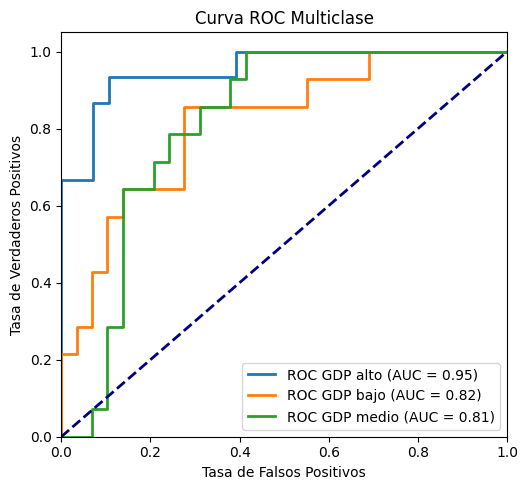


📊 Matriz de Confusión (Prueba):
[[ 9  3  3]
 [ 0 12  2]
 [ 0  5  9]]

📊 Matriz de Confusión (Entrenamiento):
[[40 12  5]
 [ 0 51  5]
 [ 0 14 41]]

📝 Reporte de Clasificación:
              precision    recall  f1-score   support

    GDP alto       1.00      0.60      0.75        15
    GDP bajo       0.60      0.86      0.71        14
   GDP medio       0.64      0.64      0.64        14

    accuracy                           0.70        43
   macro avg       0.75      0.70      0.70        43
weighted avg       0.75      0.70      0.70        43



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener el mejor modelo
best_model = grid_search.best_estimator_
print("\n🏆 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test_final)
y_pred_prob = best_model.predict_proba(X_test_final)

## curva ROC multiclase
# Binarizar las etiquetas para el problema multiclase
y_test_binarized = label_binarize(y_test, classes=best_model.classes_)

# Calcular las probabilidades predichas para cada clase
y_pred_prob = best_model.predict_proba(X_test_final)

# Crear una figura
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)

# Graficar la curva ROC para cada clase
for i in range(len(best_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2,
             label=f'ROC {best_model.classes_[i]} (AUC = {roc_auc:.2f})')

# Línea de referencia para un clasificador aleatorio
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase')
plt.legend(loc="lower right")

# Mostrar la figura
plt.tight_layout()
plt.show()

# Calcular métricas
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, best_model.predict(X_train_final))

print("\n📊 Matriz de Confusión (Prueba):")
print(cm_test)

print("\n📊 Matriz de Confusión (Entrenamiento):")
print(cm_train)

print("\n📝 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

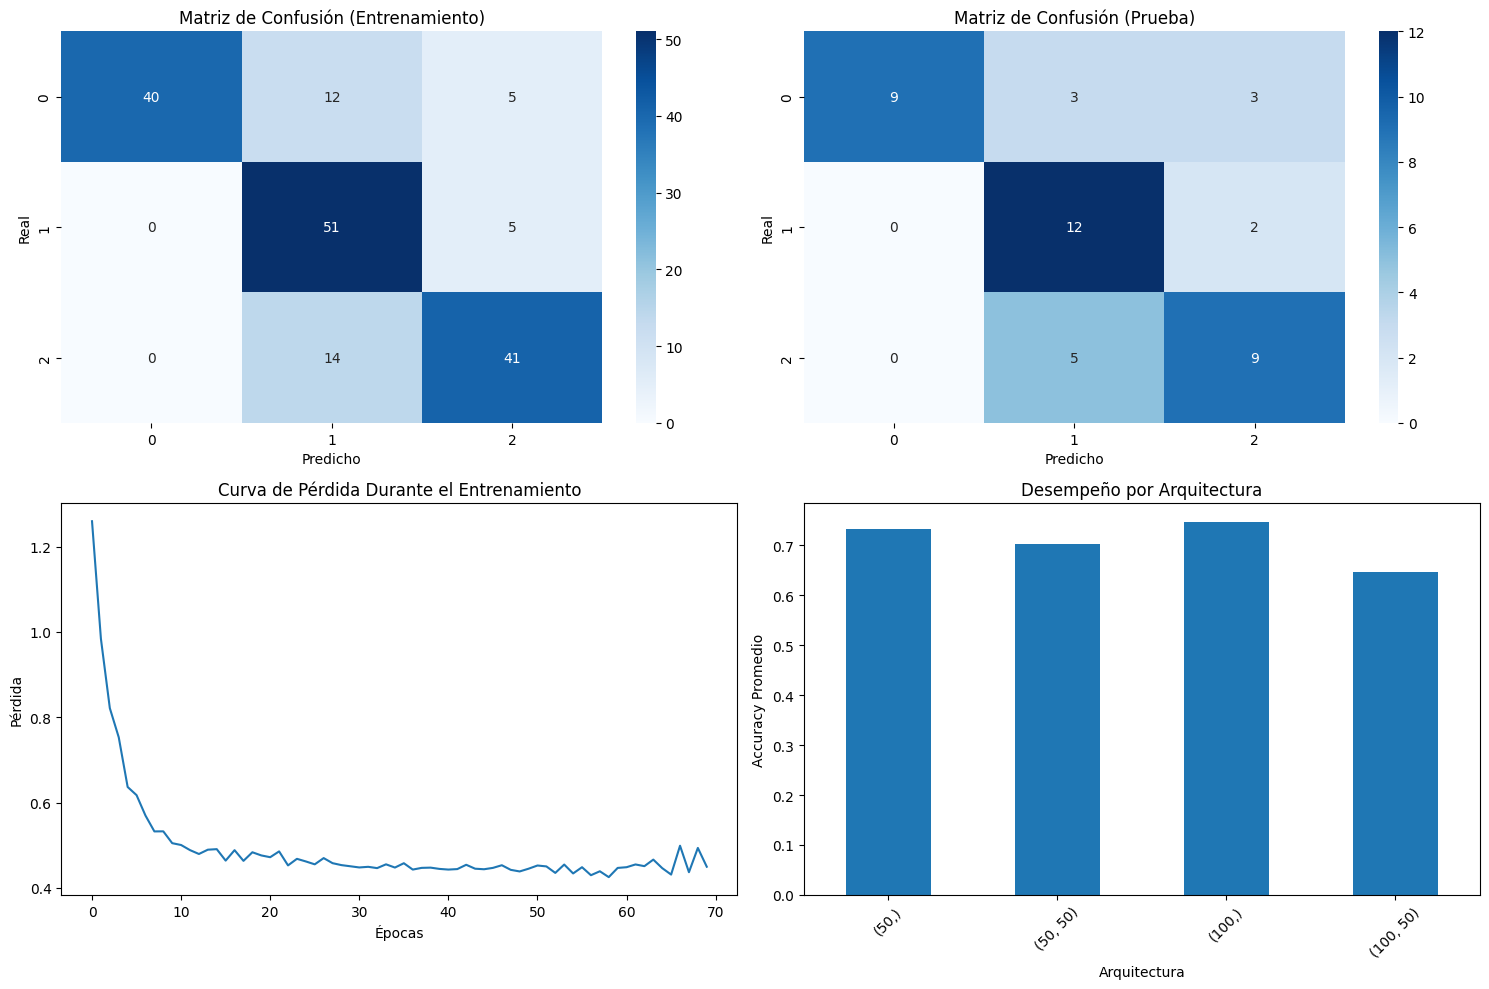

In [ ]:
plt.figure(figsize=(15, 10))

# Matriz de Confusión en Entrenamiento
plt.subplot(2, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Entrenamiento)')
plt.xlabel('Predicho')
plt.ylabel('Real')

# Matriz de Confusión en Prueba
plt.subplot(2, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Prueba)')
plt.xlabel('Predicho')
plt.ylabel('Real')

#Curva de Pérdida
plt.subplot(2, 2, 3)
plt.plot(best_model.loss_curve_)
plt.title('Curva de Pérdida Durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

#Comparación de Arquitecturas
plt.subplot(2, 2, 4)
results_df = pd.DataFrame(grid_search.cv_results_)
architectures = results_df.groupby('param_hidden_layer_sizes')['mean_test_score'].mean()
architectures.plot(kind='bar')
plt.title('Desempeño por Arquitectura')
plt.xlabel('Arquitectura')
plt.ylabel('Accuracy Promedio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 📊 Red Neuronal Profunda

In [ ]:
import pandas as pd

# Guardar los resultados del Grid Search
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('grid_search_results.csv', index=False)
print("\n💾 Resultados del Grid Search guardados en 'grid_search_results.csv'")


💾 Resultados del Grid Search guardados en 'grid_search_results.csv'


In [ ]:
# Instalación silenciosa de librerías
# Frameworks de Deep Learning
!pip install -q tensorflow
!pip install -q torch
!pip install -q keras
!pip install keras-tuner
# Optimización y evaluación
!pip install -q optuna
!pip install -q tensorboard
!pip install -q scikit-optimize

# Utilidades
!pip install -q tqdm
!pip install -q joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# ======================
# 1. IMPORTACIÓN DE LIBRERÍAS
# ======================
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt  # Para búsqueda de hiperparámetros
import numpy as np
import pandas as pdit
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Fijamos una semilla para reproducibilidad
RANDOM_SEED = 42
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# ======================
# 2. CONFIGURACIÓN DE HIPERPARÁMETROS
# ======================
# Definimos el rango de valores que puede tomar cada hiperparámetro
HP_RANGES = {
    # Número de capas ocultas (entre 4 y 5)
    'n_layers': {
        'min_value': 3,
        'max_value': 4,
        'step': 1
    },

    # Número de neuronas por capa (40 o 80)
    'units': {
        'min_value': 16,
        'max_value': 32,
        'step': 4
    },

    # Tasa de dropout para regularización (entre 0.2 y 0.4)
    'dropout': {
        'min_value': 0.05,
        'max_value': 0.1,
        'step': 0.05
    },

    # Tasa de aprendizaje del optimizador
    'learning_rate': [0.001, 0.01,0.0001],  # Probamos dos valores

    # Factor de regularización L2
    'l2_lambda': [0.0001, 0.001,0.00001]  # Probamos dos valores
}

# Configuración del entrenamiento
TRAINING_CONFIG = {
    'epochs': 200,          # Número de pasadas por todo el dataset
    'batch_size': 32,      # Tamaño de los mini-lotes
    'max_trials': 6        # Número de combinaciones de hiperparámetros a probar
}

In [ ]:
print(X_train_final.shape)
print(y_train.shape)
print(X_test_final.shape)
print(y_test.shape)

(168, 67)
(168,)
(43, 67)
(43,)


In [ ]:
def create_model(hp):
    """
    Función que crea el modelo con los hiperparámetros que se están probando.
    hp: objeto que permite acceder a los hiperparámetros que se están evaluando
    """
    model = keras.Sequential()

    # Decidimos cuántas capas tendrá el modelo
    n_layers = hp.Int('n_layers', **HP_RANGES['n_layers'])

    # Primera capa (capa de entrada)
    model.add(keras.layers.Dense(
        units=hp.Int('units_0', **HP_RANGES['units']),  # Número de neuronas
        input_shape=(67,),  # 67 características de entrada
        kernel_regularizer=keras.regularizers.l2(  # Regularización L2
            hp.Choice('l2_0', HP_RANGES['l2_lambda'])
        )
    ))
    # Añadimos capas auxiliares para mejorar el entrenamiento
    model.add(keras.layers.BatchNormalization())  # Normaliza las activaciones
    model.add(keras.layers.ReLU())  # Función de activación
    model.add(keras.layers.Dropout(  # Previene el sobreajuste
        hp.Float('dropout_0', **HP_RANGES['dropout'])
    ))

    # Agregamos las capas ocultas adicionales
    for i in range(1, n_layers):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i}', **HP_RANGES['units']),
            kernel_regularizer=keras.regularizers.l2(
                hp.Choice(f'l2_{i}', HP_RANGES['l2_lambda'])
            )
        ))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.ReLU())
        model.add(keras.layers.Dropout(
            hp.Float(f'dropout_{i}', **HP_RANGES['dropout'])
        ))

    # Capa de salida (una neurona con sigmoid para clasificación binaria)
    model.add(keras.layers.Dense(3, activation='softmax'))

    # Compilamos el modelo
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', HP_RANGES['learning_rate'])
        ),
        loss='categorical_crossentropy',  # Función de pérdida para clasificación categórica
        metrics=['accuracy']  # Métrica que queremos monitorear
    )
    return model

In [ ]:
mapping = {
    'GDP bajo': 1,
    'GDP medio': 2,
    'GDP alto': 3
}
# First map the values
y_train_numeric = y_train.map(mapping)

# Then convert to int32
y_train_numeric = y_train_numeric.astype('int32')

y_test_numeric = y_test.map(mapping)
y_test_numeric = y_test_numeric.astype('int32')
# Convert to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train_numeric - 1, num_classes=3)
y_test_onehot = tf.keras.utils.to_categorical(y_test_numeric - 1, num_classes=3)

In [ ]:
# ======================
# 5. BÚSQUEDA DE MEJORES HIPERPARÁMETROS
# ======================
# Iniciamos la búsqueda aleatoria de hiperparámetros
tuner = kt.RandomSearch(
    create_model,
    objective='val_accuracy',  # Optimizamos basándonos en la precisión
    max_trials=TRAINING_CONFIG['max_trials'],
    directory='keras_tuner',
    project_name='bank_marketing',
    overwrite=True
)

# Configuramos early stopping para evitar sobreajuste
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,  # Esperamos 2 épocas antes de parar
    restore_best_weights=True  # Guardamos los mejores pesos
)

# Realizamos la búsqueda
tuner.search(
    X_train_final,
    y_train_onehot,
    epochs=TRAINING_CONFIG['epochs'],
    batch_size=TRAINING_CONFIG['batch_size'],
    validation_split=0.2,  # 20% de los datos para validación
    callbacks=[stop_early],
    verbose=1
)



Trial 6 Complete [00h 00m 05s]
val_accuracy: 0.23529411852359772

Best val_accuracy So Far: 0.8235294222831726
Total elapsed time: 00h 01m 09s


In [ ]:
# ======================
# 6. ENTRENAMIENTO DEL MEJOR MODELO
# ======================
# Obtenemos los mejores hiperparámetros encontrados
best_hps = tuner.get_best_hyperparameters()[0]
print("\n🏆 Mejores hiperparámetros encontrados:")
print("Número de capas:", best_hps.get('n_layers'))
print("Tasa de aprendizaje:", best_hps.get('learning_rate'))

# Entrenamos el modelo final con los mejores hiperparámetros
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train_final,
    y_train_onehot,
    epochs=TRAINING_CONFIG['epochs'],
    batch_size=TRAINING_CONFIG['batch_size'],
    validation_split=0.2,
    verbose=1
)

# Evaluamos el modelo final
test_loss, test_acc = best_model.evaluate(X_test_final, y_test_onehot, verbose=0)
print(f"\n📊 Precisión final en test: {test_acc:.2%}")


🏆 Mejores hiperparámetros encontrados:
Número de capas: 3
Tasa de aprendizaje: 0.001
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.4729 - loss: 1.2038 - val_accuracy: 0.4412 - val_loss: 1.1275
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4963 - loss: 1.1034 - val_accuracy: 0.5588 - val_loss: 1.1235
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4626 - loss: 1.0898 - val_accuracy: 0.7353 - val_loss: 1.1217
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4891 - loss: 1.0015 - val_accuracy: 0.5882 - val_loss: 1.1226
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5359 - loss: 1.0411 - val_accuracy: 0.6471 - val_loss: 1.1206
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5801 - loss: 0.9307 - val_accuracy: 0.7647 - val_loss: 1.1185
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6324 - loss: 0.8738 - val_accuracy: 0.6471 - val_loss: 1.1160
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6151 - loss: 0.9042 - val_accuracy: 0.6176 - val_loss: 1.1127
Epo

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


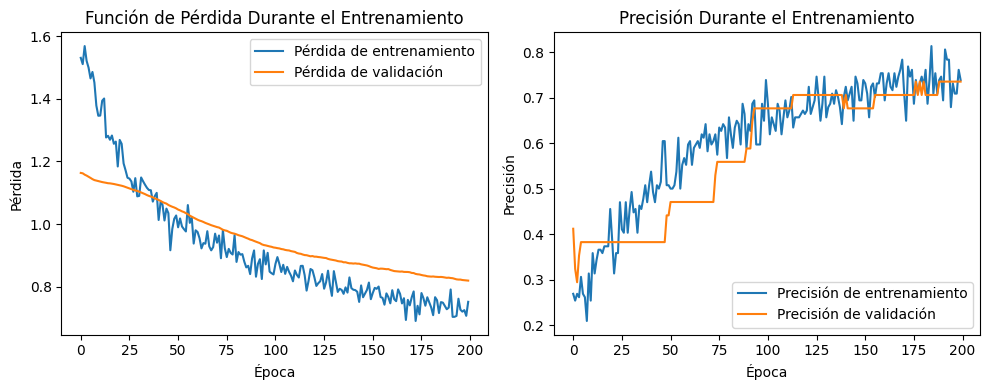

In [ ]:
# ======================
# 7. EVALUACIÓN COMPLETA (CON Y=0 COMO CLASE POSITIVA)
# ======================
from sklearn.metrics import classification_report, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones
y_probs = best_model.predict(X_test_final)
y_pred = (y_probs > 0.5).astype(int)

# 1. Visualización de la función de pérdida
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Función de Pérdida Durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión Durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


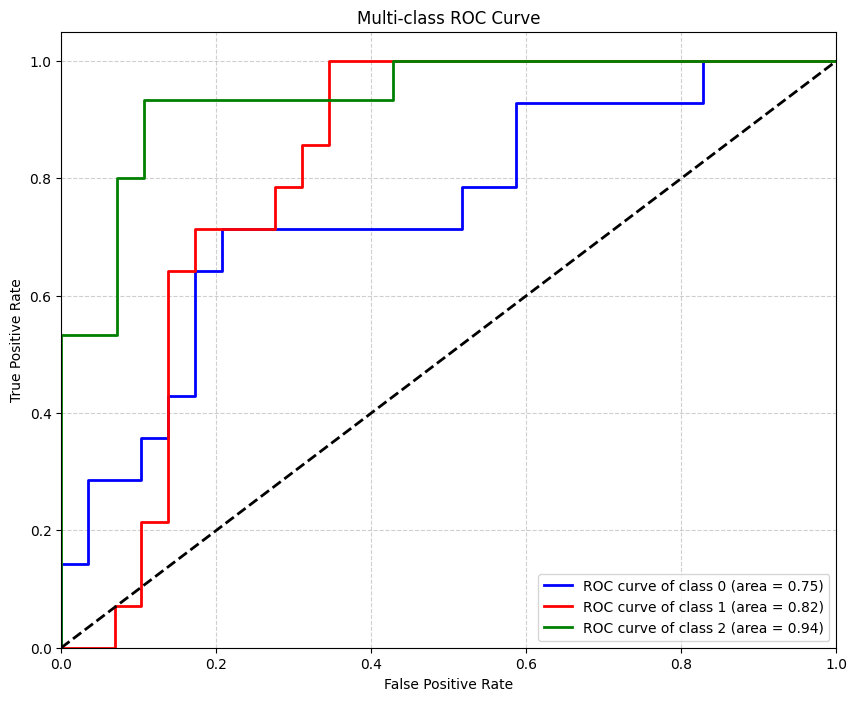


🎯 AUC Scores:
Class 0: 0.7463
Class 1: 0.8177
Class 2: 0.9381
Macro-average AUC: 0.8498


In [ ]:
# ======================
# 7. ROC CURVE VISUALIZATION
# ======================
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Get the predicted probabilities for the test set
y_pred_proba = best_model.predict(X_test_final)

# Variables for plotting
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and ROC area for each class (one-vs-rest)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Save the plot
plt.savefig('multiclass_roc_curve.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print AUC scores
print("\n🎯 AUC Scores:")
for i in range(n_classes):
    print(f"Class {i}: {roc_auc[i]:.4f}")

# Calculate macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

macro_roc_auc = auc(all_fpr, mean_tpr)
print(f"Macro-average AUC: {macro_roc_auc:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


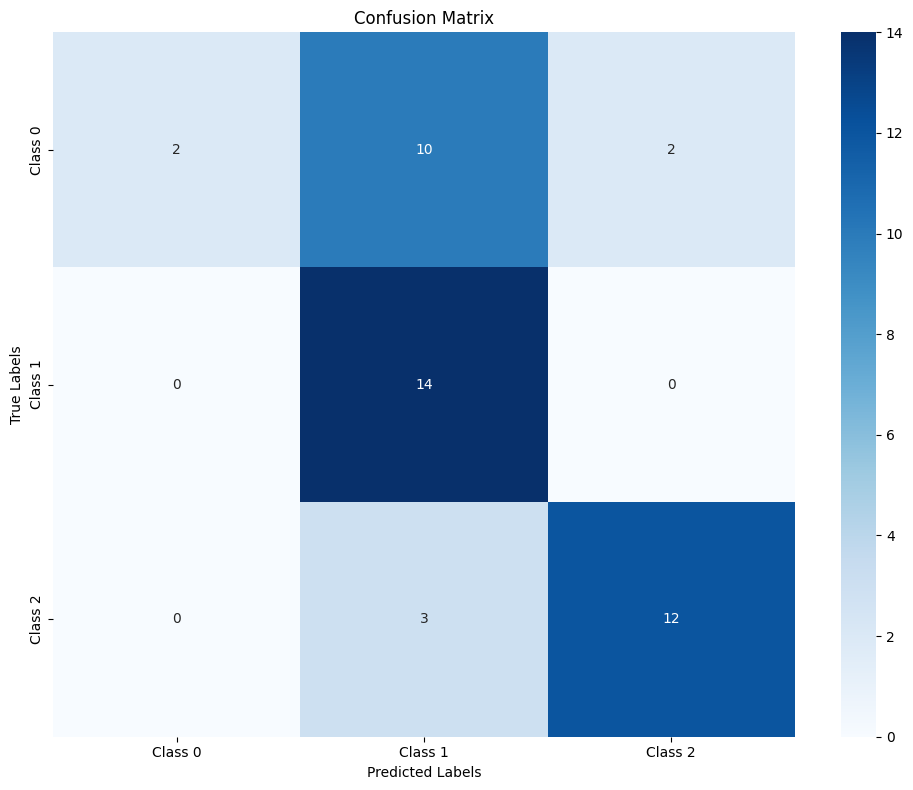


📊 Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.14      0.25        14
     Class 1       0.52      1.00      0.68        14
     Class 2       0.86      0.80      0.83        15

    accuracy                           0.65        43
   macro avg       0.79      0.65      0.59        43
weighted avg       0.79      0.65      0.59        43


🎯 Overall Accuracy: 0.6512


In [ ]:
# ======================
# 8. CONFUSION MATRIX VISUALIZATION
# ======================
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions for test data
# First get the probability predictions
y_pred_proba = best_model.predict(X_test_final)
# Convert probabilities to class predictions (highest probability class)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
# Get true labels in same format
y_test_classes = np.argmax(y_test_onehot, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Create class labels based on your problem
# Replace these with your actual class names
class_names = ['Class 0', 'Class 1', 'Class 2']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Add text for precision, recall in each cell
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.7, f'',
                 horizontalalignment='center',
                 size=9, color='black' if cm[i, j] < cm.max()/2 else 'white')

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Print classification report for more detailed metrics
print("\n📊 Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

# Calculate overall accuracy
accuracy = np.sum(y_test_classes == y_pred_classes) / len(y_test_classes)
print(f"\n🎯 Overall Accuracy: {accuracy:.4f}")